In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(16.7,13.27)})

In [2]:
lane1 = pd.read_csv("Lane1.csv")
lane1['Detector_Id'] = lane1['Detector_Id'].astype(str)

In [3]:
lane1.head()

,ID,Date,Time,Detector_Id,Occupancy,Volume,Speed_Sum,Speed_Obs,Configuration_Id,Available,Incident,Failed
0,4181788,09/04/2019,7:45:00,1109519,50,6,608,6,7071,True,False,False
1,4181789,09/04/2019,7:45:20,1109519,57,7,715,7,7071,True,False,False
2,4181790,09/04/2019,7:45:40,1109519,62,8,847,8,7071,True,False,False
3,4181791,09/04/2019,7:46:00,1109519,8,1,103,1,7071,True,False,False
4,4181792,09/04/2019,7:46:20,1109519,17,2,203,2,7071,True,False,False


In [4]:
#lane1 = lane1.set_index('Detector_Id')

In [5]:
lane1 = lane1.drop(columns = ['ID', 'Date','Volume','Speed_Sum','Speed_Obs','Configuration_Id','Available','Incident','Failed'])

In [6]:
lane1.head()

,Time,Detector_Id,Occupancy
0,7:45:00,1109519,50
1,7:45:20,1109519,57
2,7:45:40,1109519,62
3,7:46:00,1109519,8
4,7:46:20,1109519,17


In [7]:
data = pd.DataFrame({'X': lane1['Detector_Id'], 'Y': lane1['Time'], 'Z': lane1['Occupancy']})
data_pivoted = data.pivot("X", "Y", "Z")

In [8]:
data_pivoted.head(20)

Y,7:45:00,7:45:20,7:45:40,7:46:00,7:46:20,7:46:40,7:47:00,7:47:20,7:47:40,7:48:00,...,9:11:40,9:12:00,9:12:20,9:12:40,9:13:00,9:13:20,9:13:40,9:14:00,9:14:20,9:14:40
X,,,,,,,,,,,,,,,,,,,,,
1096944,52,63,26,63,15,50,22,0,47,40,...,21,0,8,8,24,34,7,0,8,0
1097025,38,30,55,33,53,24,48,22,8,39,...,0,21,0,15,8,24,34,0,0,8
1097041,22,44,23,58,59,39,15,41,31,8,...,17,7,7,16,0,8,8,41,8,0
1097058,22,23,29,61,8,64,34,30,32,15,...,0,8,7,7,16,0,0,31,18,8
1097075,23,24,24,15,32,15,64,34,15,33,...,17,0,8,7,7,8,0,0,31,18
1097112,55,31,25,16,15,46,22,8,82,34,...,8,24,16,9,8,15,16,7,0,0
1097136,50,64,25,16,24,30,23,31,40,74,...,8,7,51,0,8,7,24,15,0,0
1109519,50,57,62,8,17,24,26,22,32,39,...,0,7,15,34,0,8,7,31,15,0
1109577,24,17,24,23,25,23,8,75,35,35,...,23,25,0,8,15,8,7,0,0,52


In [9]:
df2= data_pivoted.reindex(['1096944','1097025','1097041','1097058','1097075','1109577','1097112','1097136','1109519'])

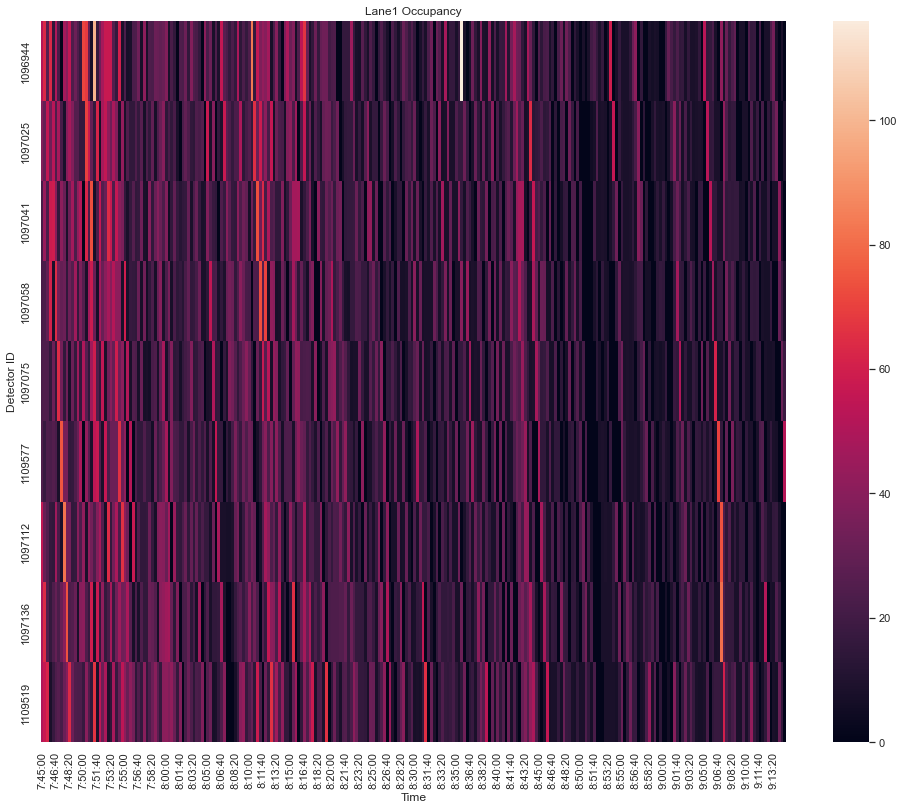

In [11]:
ax = sns.heatmap(df2)
ax.set(xlabel='Time', ylabel='Detector ID', title='Lane1 Occupancy');